In [1]:
import pandas as pd
import numpy as np 
import requests
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor
import json
from datetime import datetime
import seaborn as sns

In [3]:
df_covid_limpio = pd.read_csv('df_covid_limpio.csv', sep=',')
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2022-03-27,AS,American Samoa,1881,3278,2,2,0.061013
1,2022-04-03,AS,American Samoa,1378,4656,5,7,0.150344
2,2022-04-10,AS,American Samoa,746,5402,4,11,0.203628
3,2022-04-17,AS,American Samoa,133,5535,7,18,0.325203
4,2022-04-24,AS,American Samoa,230,5765,5,23,0.398959


In [5]:
#Usando el dataframe df_covid_limpio, vamos a agrupar por país y fecha para obtener el valor de la columna Cumulative_cases, luego guardamos el resultado en grouped_df.
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()

In [6]:
#Luego reiniciamos el índice de grouped_df.
grouped_df = grouped_df.reset_index()

In [7]:
#Indicamos que el índice de grouped_df sea la columna Country.
grouped_df = grouped_df.set_index('Country')

In [8]:

#Luego filtramos y dejamos en grouped_df sólo los registros del país que estamos analizando.
grouped_df = grouped_df.loc[['France']]

In [11]:
#Creo una variable fechas conteniendo todas las columnas de grouped_df, que son las fechas reportadas en el país.
fechas = grouped_df.columns

In [13]:
#Utilizando la variable fechas voy a calcular la diferencia de valores entre la columna anterior y columna actual y reemplazaré el valor de la columna actual por la diferencia calculada, realizaremos esto para todas las fechas, guardaremos el resultado en new_cases.
new_cases = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)

In [14]:
#Finalmente, retiraremos los registros de new_cases con valores negativos.
new_cases = new_cases[new_cases > 0]
new_cases

Date_reported
2022-01-16    13538779.0
2022-01-23     2417043.0
2022-01-30     2329374.0
2022-02-06     1707588.0
2022-02-13      958639.0
                 ...    
2023-05-28       25230.0
2023-06-04       18614.0
2023-06-11       15618.0
2023-06-18       11200.0
2023-06-25        7982.0
Length: 76, dtype: float64

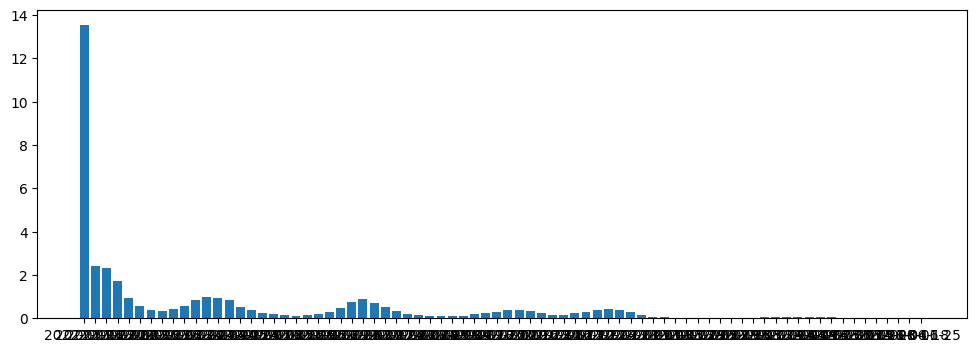

In [15]:
# Crea el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 4))
bars = ax.bar(new_cases.index, new_cases.values/ 1e6)